In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder
from sksurv.datasets import load_breast_cancer
from sksurv.nonparametric import kaplan_meier_estimator

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TNBC-train.csv')
df.head()

,Num,OS_status,OS_time,DFS_status,DFS_time
0,3,1,58.633333,1,58.633333
1,12,1,38.733333,1,38.733333
2,14,1,97.166667,1,97.166667
3,19,0,28.200000,0,19.266667
4,25,1,105.800000,1,105.800000


In [3]:
df["OS_status"]=df["OS_status"].astype(bool)
df["OS_status"]

0       True
1       True
2       True
3      False
4       True
       ...  
338     True
339     True
340     True
341     True
342    False
Name: OS_status, Length: 343, dtype: bool

In [4]:
df["DFS_status"]=df["DFS_status"].astype(bool)
df["DFS_status"]

0       True
1       True
2       True
3      False
4       True
       ...  
338     True
339     True
340     True
341     True
342    False
Name: DFS_status, Length: 343, dtype: bool

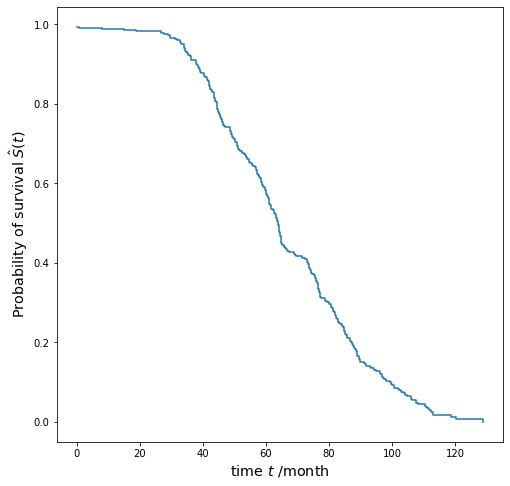

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
time, survival_prob = kaplan_meier_estimator(df["OS_status"], df["OS_time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("Probability of survival $\hat{S}(t)$", fontsize = 'x-large')
plt.xlabel("time $t$ /month", fontsize = 'x-large')
plt.savefig('1.jpg',dpi=1200)
plt.show()

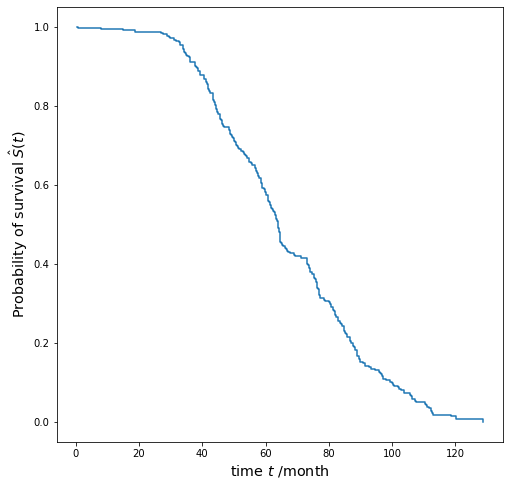

In [6]:
time1, survival_prob1 = kaplan_meier_estimator(df["DFS_status"], df["DFS_time"])
plt.step(time1, survival_prob1, where="post")
plt.ylabel("Probability of survival $\hat{S}(t)$", fontsize = 'x-large')
plt.xlabel("time $t$ /month", fontsize = 'x-large')
plt.savefig('2.jpg',dpi=1200)
plt.show()

In [7]:
df1 = pd.read_csv('TNBC-test.csv')
df1.head()

,Num,OS_status,OS_time,DFS_status,DFS_time
0,1,0,20.866667,0,11.233333
1,2,1,74.666667,0,31.600000
2,4,1,58.533333,1,58.533333
3,5,0,40.433333,0,13.766667
4,6,1,94.966667,1,94.966667


In [8]:
df1["OS_status"]=df1["OS_status"].astype(bool)
df1["OS_status"]

0     False
1      True
2      True
3     False
4      True
5      True
6      True
7     False
8      True
9     False
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37    False
38     True
39     True
Name: OS_status, dtype: bool

In [9]:
df1["DFS_status"]=df1["DFS_status"].astype(bool)
df1["DFS_status"]

0     False
1     False
2      True
3     False
4      True
5      True
6      True
7     False
8      True
9     False
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34    False
35     True
36     True
37    False
38     True
39     True
Name: DFS_status, dtype: bool

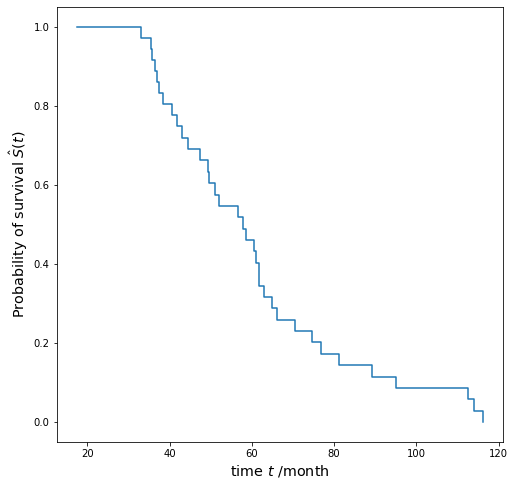

In [10]:
time, survival_prob = kaplan_meier_estimator(df1["OS_status"], df1["OS_time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("Probability of survival $\hat{S}(t)$", fontsize = 'x-large')
plt.xlabel("time $t$ /month", fontsize = 'x-large')
plt.savefig('3.jpg',dpi=1200)
plt.show()

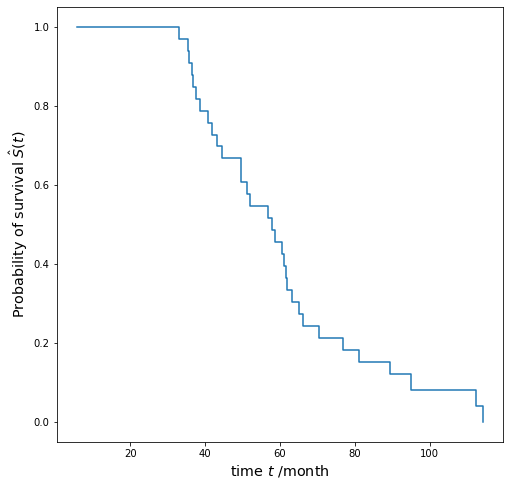

In [11]:
time1, survival_prob1 = kaplan_meier_estimator(df1["DFS_status"], df1["DFS_time"])
plt.step(time1, survival_prob1, where="post")
plt.ylabel("Probability of survival $\hat{S}(t)$", fontsize = 'x-large')
plt.xlabel("time $t$ /month", fontsize = 'x-large')
plt.savefig('4.jpg',dpi=1200)
plt.show()